In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation

from scipy.sparse import diags
from scipy.sparse.linalg import inv 


In [13]:
def I(x):
    L = x[-1]
    len_x = np.size(x)
    i_x = np.zeros(len_x)
    for i in range(len_x):
        if x[i] < (L+1)/2 and x[i] > (L-1)/2:
            i_x[i] = 1
    return i_x

def U_exact(x, t, D):
    L = x[-1]
    u_ex = np.ones(np.size(x)) * (1/L)
    
    for n in range(1, 2000):
        c_n = (2 / (n * np.pi)) * (np.sin((n * np.pi * (L + 1)) / (2 * L)) - np.sin((n * np.pi * (L - 1)) / (2 * L)))
        
        u_ex += c_n * np.cos(n*np.pi*x / L) * np.exp(-1*n** 2 * np.pi**2 * t * D / L **2)
        
    return u_ex

In [26]:
# end length & end time
L=10; T=2

# diffusion coefficient 
a = [1, 0.145, 0.228, 0.16]
gas_name = ['control', 'ammonia', 'chlorine', 'carbon dioxide']
gas_colour = ['blue', 'orange', 'green', 'gray']

# setting up space part
Nx_spaces = 40 * L; Nt_gaps = 50 * T; 
Nx_points = Nx_spaces +  1 ; Nt_points = Nt_gaps + 1

x = np.linspace(0, L, Nx_points)   # mesh points in space
dx = x[1] - x[0]

t = np.linspace(0, T, Nt_points) # mesh points in time
dt = t[1] - t[0]


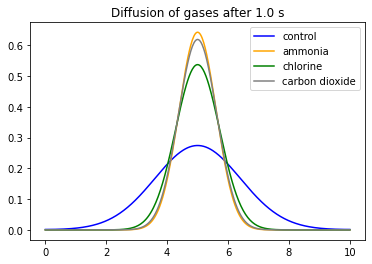

In [27]:
for i in range(len(a)):
    C = a[i] * dt/dx**2

    # set up matrices
    u   = np.zeros(Nx_points)
    u_old = np.zeros(Nx_points)

    #U = np.zeros((Nx_points,Nt_points))

    # Data structures for the linear system
    b = np.zeros(Nx_points)

    # set up the matrix A
    A = diags([-C, 1 + 2 * C, -C], [-1, 0, 1], shape = (Nx_points, Nx_points))
    A = A.toarray()
    A[0, 1] = -2 * C
    A[-1, -2] = -2 * C

    u_old = I(x) # no dirichlet boundary conditions in this example

    #perform time=stepping
    for n in range(1, 50): # timestep for 1 to t = T-1 so last step finishes on t=T
        # Compute b and solve linear system
        b[:] = u_old[:]
        u[:] = np.linalg.solve(A, b)

        # Update u_1 before next step
        u_old = u

    plt.plot(x, u, color = gas_colour[i], label = f'{gas_name[i]}')
plt.legend()
plt.title(f'Diffusion of gases after {t[50]} s')
plt.show()